#```Chetan Gupta```
#```18BCS6056```

---


**```AIML-1, 
CASE STUDY 2, 
Semester - 5```**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the csv files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
out = pd.read_csv('/content/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(train.head())
train.isnull().sum() # find total number of null values in train

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
print(test.head())
test.isnull().sum() # find total number of null values in test

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.drop(['Cabin'],axis=1,inplace=True) #drop Cabin from test and train dataset because most values are missing.
test.drop(['Cabin'],axis=1,inplace=True) # use inplace to save in the same dataset
train.fillna(train.mean(),inplace=True) #replace mean values of whole dataset with mean
test.fillna(test.mean(),inplace=True)

In [ ]:
train.isnull().sum() #again check 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
train['Embarked'].mode() #find the highest occuring letter in embarked 

0    S
dtype: object

In [ ]:
train.fillna(value='S',inplace=True) #replace the null values in embarked with mode

In [ ]:
train.isnull().sum() #again check 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# use label encoding to give values to categorical variables like embarked and sex
train['Embarked1'] = train['Embarked'].map({"S": 0, "C": 1, "Q": 2})
train['Sex1'] = train['Sex'].map({"male":0 ,"female":1})
test['Embarked1'] = test['Embarked'].map({"S": 0, "C": 1, "Q": 2})
test['Sex1'] = test['Sex'].map({"male":0 ,"female":1})

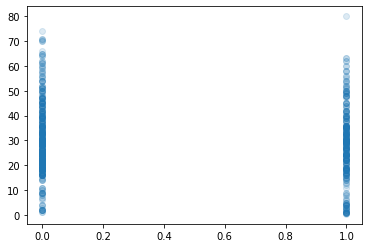

In [ ]:
plt.scatter(train.Survived, train.Age, alpha=0.15) #visualize b/w age and survived

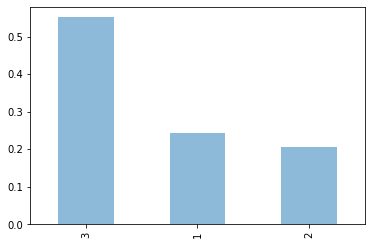

In [ ]:
train.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5) #visualize to see how many survived of each class

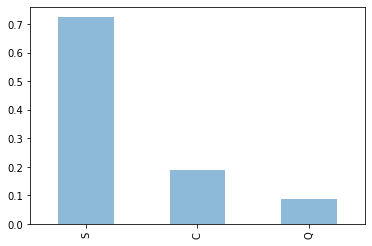

In [ ]:
#visualize to see how many survived from each port
train.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.5) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


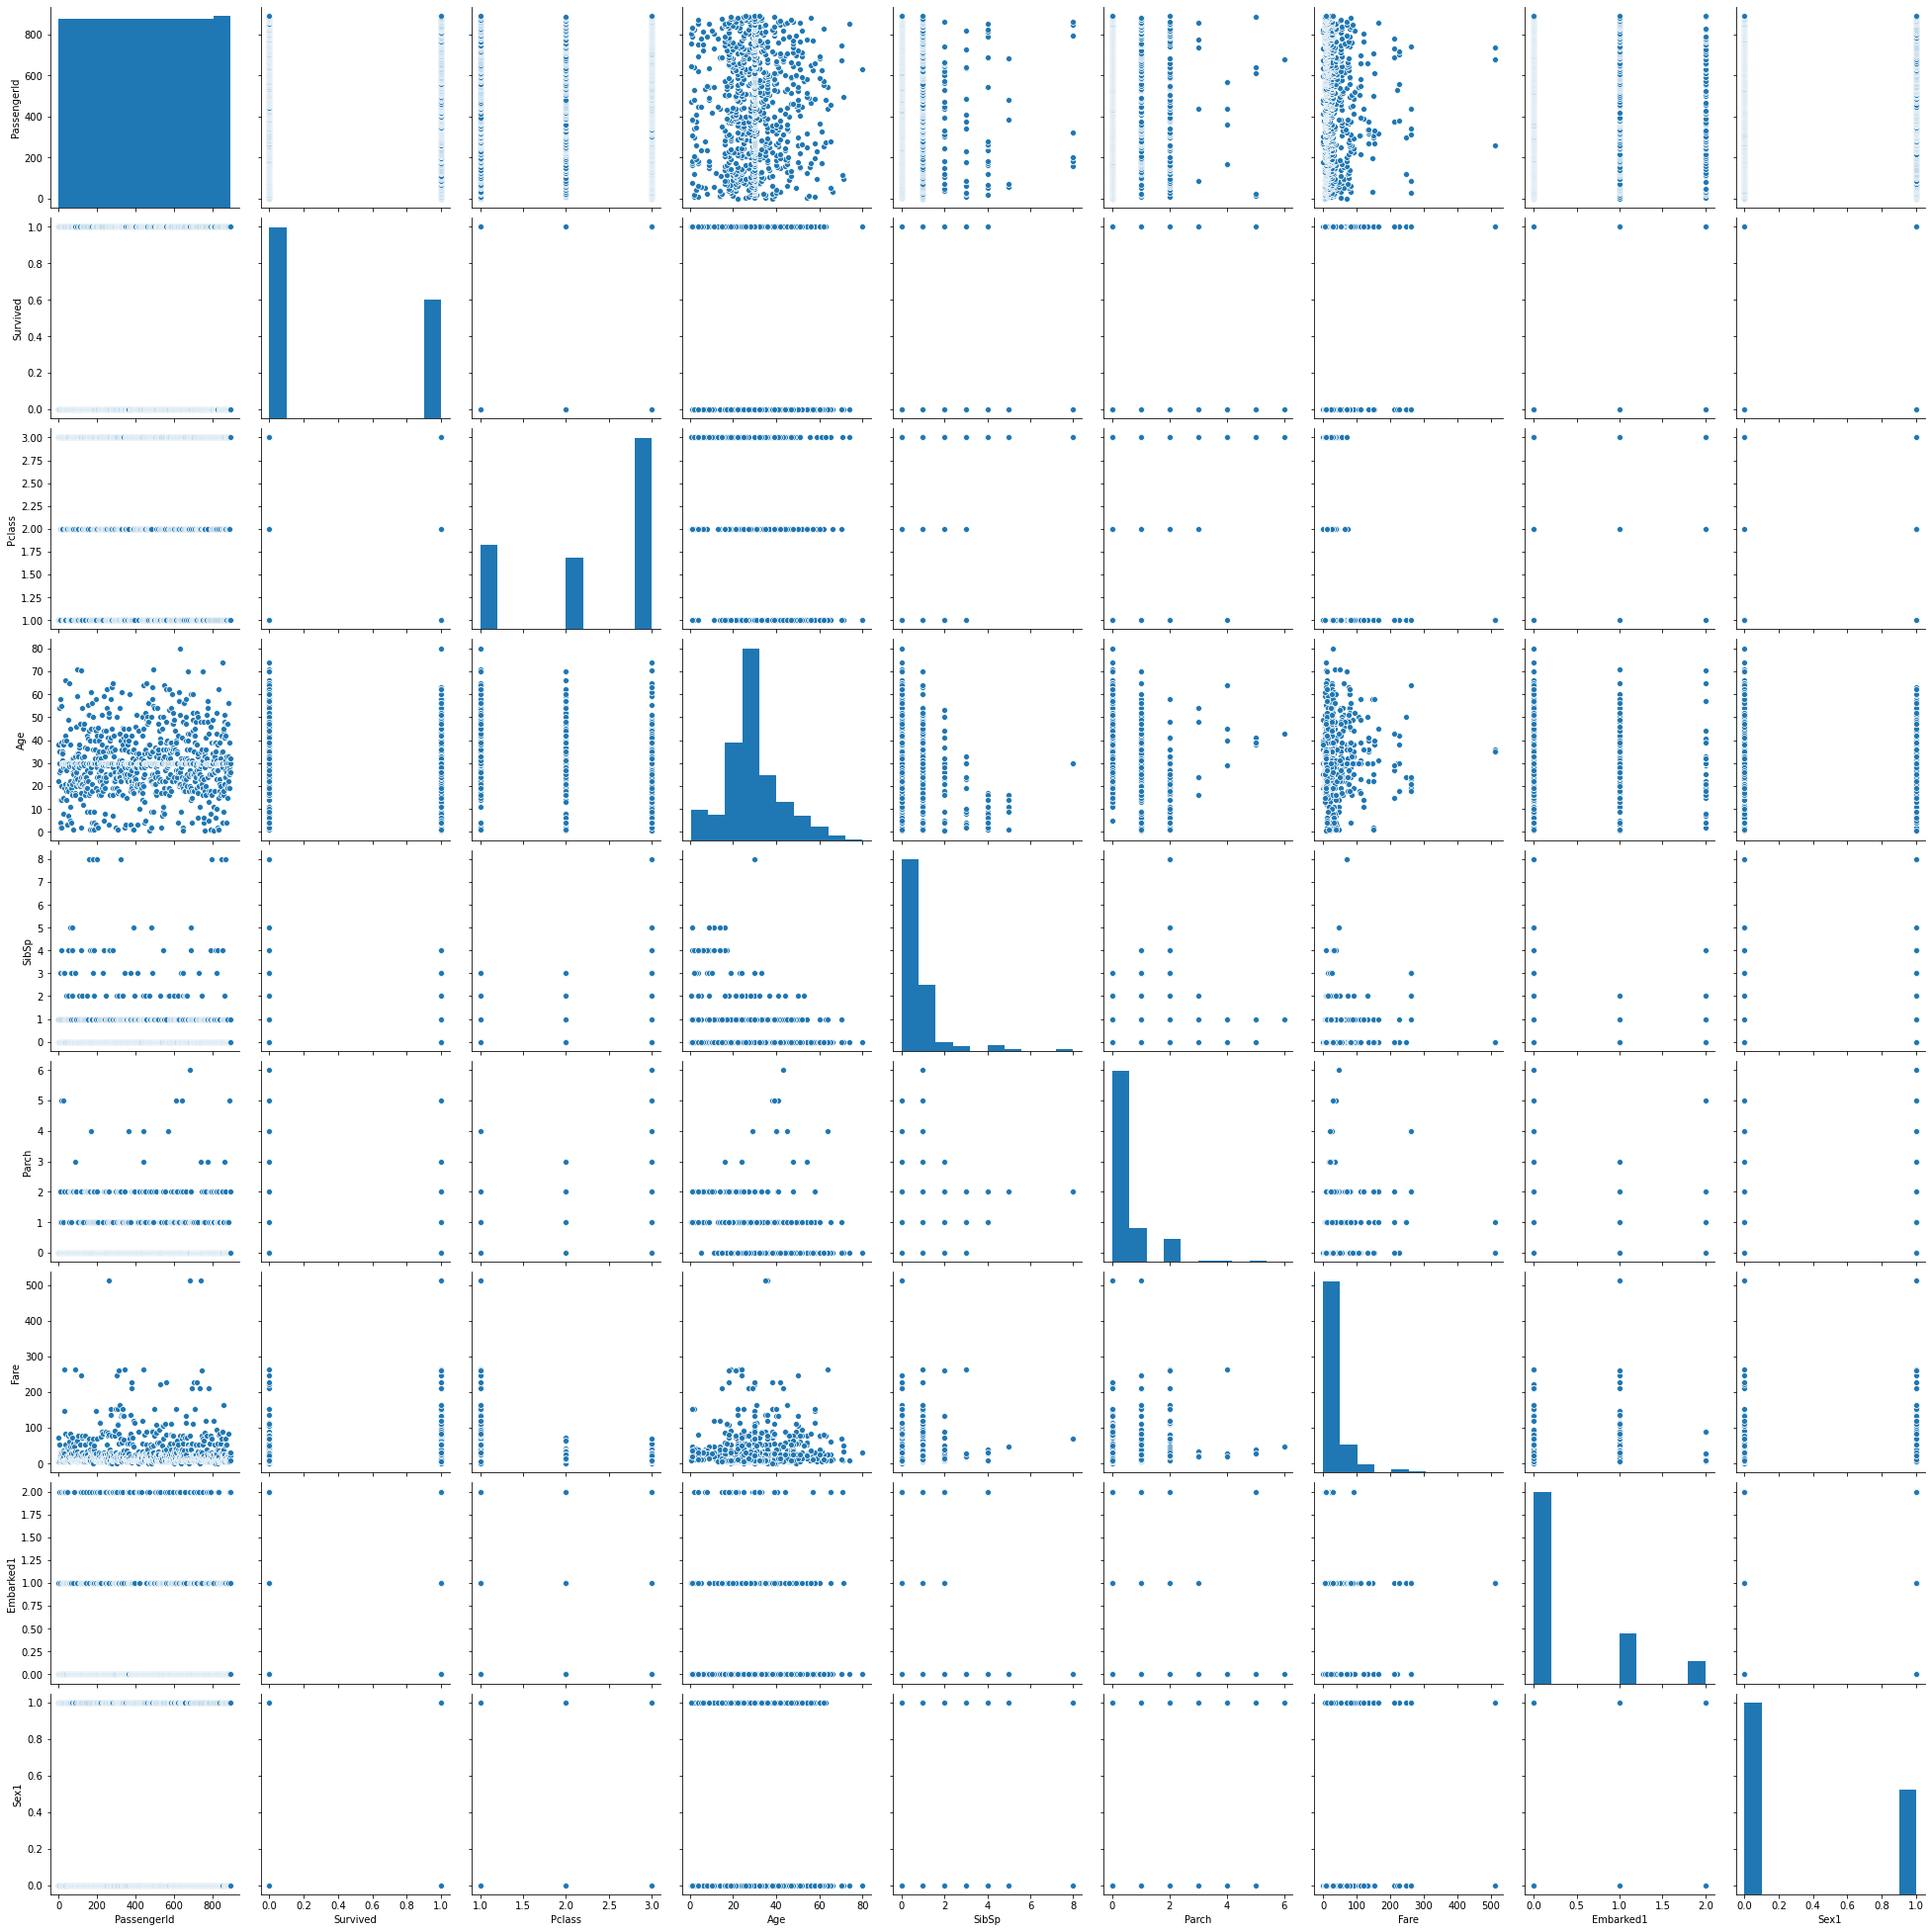

In [ ]:
sns.pairplot(train,size=3) # use pairplot to visually see correlation b/w features

In [ ]:
train.corr() #Use the corr() function to see correlation table

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked1,Sex1
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.030467,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.106811,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.045702,-0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.007461,-0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059961,0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.078665,0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.062142,0.182333
Embarked1,-0.030467,0.106811,0.045702,0.007461,-0.059961,-0.078665,0.062142,1.000000,0.116569
Sex1,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.116569,1.000000


In [ ]:
# Drop the columns of no significance and for which we used label encoding
train.drop(['Name','PassengerId','Ticket','Sex','Embarked'],axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked1,Sex1
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,0,0


In [ ]:
# Drop the columns of no significance and for which we used label encoding
test.drop(['Name','PassengerId','Ticket','Sex','Embarked'],axis=1, inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked1,Sex1
0,3,34.5,0,0,7.8292,2,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,2,0
3,3,27.0,0,0,8.6625,0,0
4,3,22.0,1,1,12.2875,0,1


In [ ]:
# use mix max scaler to scale continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # make object of min max scaler
train1 = scaler.fit_transform(train) # fit the train data in scaler to get it's values b/w 0-1
train1 = pd.DataFrame(train1,columns=[train.columns]) # can use ['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked1','Sex1'] instead of [train.columns]
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked1,Sex1
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.5,1.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0


In [ ]:
test1 = scaler.fit_transform(test) # fit the test data in scaler to get it's values b/w 0-1
test1 = pd.DataFrame(test1,columns=[test.columns]) 
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked1,Sex1
0,3,34.5,0,0,7.8292,2,0
1,3,47.0,1,0,7.0000,0,1
2,2,62.0,0,0,9.6875,2,0
3,3,27.0,0,0,8.6625,0,0
4,3,22.0,1,1,12.2875,0,1


In [ ]:
X_train = train.drop("Survived", axis=1) # X_train is target 
Y_train = train["Survived"] # Y_train has features
X_test = test.copy()

In [ ]:
X_train.shape, Y_train.shape, X_test.shape # we will see shape to avoid endof exog problem

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.model_selection import train_test_split #use this function to do the train test split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.25, random_state=0)
# x_train has 75% values of X_train
# y_train has 75% values of Y_train
# x_test has 25% values of X_train
# y_test has 25% values of Y_train

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # make an object of logistic regression
model.fit(x_train, y_train) # fit the model with x_train and y_train
Y_pred = model.predict(x_test) # predict the values using x_test

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Y_pred # print the values from x_test that we stored in Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_test,Y_pred) #make confusion matirx with y axis having y_test and x axis having Y_pred
print(cm)

[[117  22]
 [ 23  61]]


In [ ]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,Y_pred)) #print the classification report

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.73      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [ ]:
from sklearn.metrics import f1_score
score = f1_score(y_test,Y_pred) 
''' 
    see f1 score, as you have seen in classificaion report.
    here f1-score will tell weather you need to focus on values of 0 or 1 in classification report
'''
score

0.7305389221556886

In [ ]:
test_pred = model.predict(test) #predict the model for test dataset
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
output = pd.DataFrame({'PassesngerId':out['PassengerId'],'Survived':test_pred}) 
#make a dataframe to save predicted survived value from test
output.head()

,PassesngerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# save data to a csv file for kaggle submission
output.to_csv('/content/gender_submission.csv',index=False)

#``` Download Data from ``` = https://www.kaggle.com/c/titanic/data

